In [1]:
## Import necessary librarise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#read cvs file
#df = pd.read_csv('C:\\Lincolnuni\\COMP_647\\project_1\\comp647\\dataset\\raw\\crop_yield_dataset.csv')
df = pd.read_csv('../dataset/processed/crop_soiltype_data.csv')

# Display the first 5 rows
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,N,P,K,Soil_Quality,Crop_Yield,Year,Month,Day
0,2014-01-01,Wheat,Peaty,5.50,60.5,45.0,31.5,22.833333,0.000000,2014,1,1
1,2014-01-01,Corn,Loamy,6.50,84.0,66.0,50.0,66.666667,104.871310,2014,1,1
2,2014-01-01,Rice,Peaty,5.50,71.5,54.0,38.5,27.333333,0.000000,2014,1,1
3,2014-01-01,Barley,Sandy,6.75,50.0,40.0,30.0,35.000000,58.939796,2014,1,1
4,2014-01-01,Soybean,Peaty,5.50,49.5,45.0,38.5,22.166667,32.970413,2014,1,1


In [3]:
print(df.isnull().sum())

Date            0
Crop_Type       0
Soil_Type       0
Soil_pH         0
N               0
P               0
K               0
Soil_Quality    0
Crop_Yield      0
Year            0
Month           0
Day             0
dtype: int64


In [4]:
#Print data info (data types, non-null counts, memory usage)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520 non-null  object 
 1   Crop_Type     36520 non-null  object 
 2   Soil_Type     36520 non-null  object 
 3   Soil_pH       36520 non-null  float64
 4   N             36520 non-null  float64
 5   P             36520 non-null  float64
 6   K             36520 non-null  float64
 7   Soil_Quality  36520 non-null  float64
 8   Crop_Yield    36520 non-null  float64
 9   Year          36520 non-null  int64  
 10  Month         36520 non-null  int64  
 11  Day           36520 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 3.3+ MB
None


In [5]:
#Display summary statistics for numerical columns
print(df.describe())

            Soil_pH             N             P            K  Soil_Quality  \
count  36520.000000  36520.000000  36520.000000  36520.00000  36520.000000   
mean       6.602731     66.011035     53.014006     42.01825     37.516632   
std        0.816973     10.886721      8.812884      8.53781     17.703171   
min        5.500000     45.000000     36.000000     27.00000     13.291667   
25%        6.250000     58.500000     45.000000     35.00000     22.500000   
50%        6.500000     65.000000     54.000000     42.00000     35.583333   
75%        6.750000     71.500000     60.000000     49.50000     49.291667   
max        8.000000     91.000000     72.000000     60.00000     74.333333   

         Crop_Yield          Year         Month           Day  
count  36520.000000  36520.000000  36520.000000  36520.000000  
mean      26.878480   2018.499726      6.523549     15.727820  
std       25.740936      2.871939      3.448580      8.799445  
min        0.000000   2014.000000      1.

In [6]:
# Example: Remove outliers from the 'Temperature' column using the IQR method
Q1 = df['Soil_Quality'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['Soil_Quality'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

print(Q1)
print(Q3)

22.5
49.29166666666667


In [7]:
# Filter out values outside the acceptable range (Q1 - 1.5*IQR to Q3 + 1.5*IQR)
df = df[(df['Soil_Quality'] >= Q1 - 1.5 * IQR) & (df['Soil_Quality'] <= Q3 + 1.5 * IQR)]
print(df)
print("Outliers removed from 'Soil_Quality' using IQR method")

             Date  Crop_Type Soil_Type  Soil_pH     N     P     K  \
0      2014-01-01      Wheat     Peaty     5.50  60.5  45.0  31.5   
1      2014-01-01       Corn     Loamy     6.50  84.0  66.0  50.0   
2      2014-01-01       Rice     Peaty     5.50  71.5  54.0  38.5   
3      2014-01-01     Barley     Sandy     6.75  50.0  40.0  30.0   
4      2014-01-01    Soybean     Peaty     5.50  49.5  45.0  38.5   
...           ...        ...       ...      ...   ...   ...   ...   
36515  2023-12-31     Cotton      Clay     6.25  66.0  55.0  48.0   
36516  2023-12-31  Sugarcane     Peaty     5.50  71.5  54.0  42.0   
36517  2023-12-31     Tomato     Sandy     6.75  50.0  36.0  30.0   
36518  2023-12-31     Potato     Peaty     5.50  60.5  45.0  31.5   
36519  2023-12-31  Sunflower      Clay     6.25  60.0  55.0  44.0   

       Soil_Quality  Crop_Yield  Year  Month  Day  
0         22.833333    0.000000  2014      1    1  
1         66.666667  104.871310  2014      1    1  
2         27.33

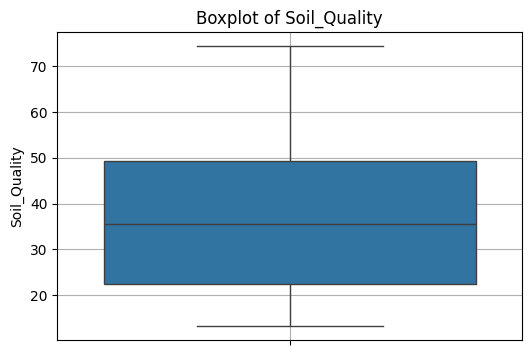

In [8]:

# Set plot size
plt.figure(figsize=(6, 4))

# Draw boxplot for 'Temperature'
sns.boxplot(y=df['Soil_Quality'])

# Set title
plt.title('Boxplot of Soil_Quality')
plt.ylabel('Soil_Quality')
plt.grid(True)

# Show the plot
plt.show()

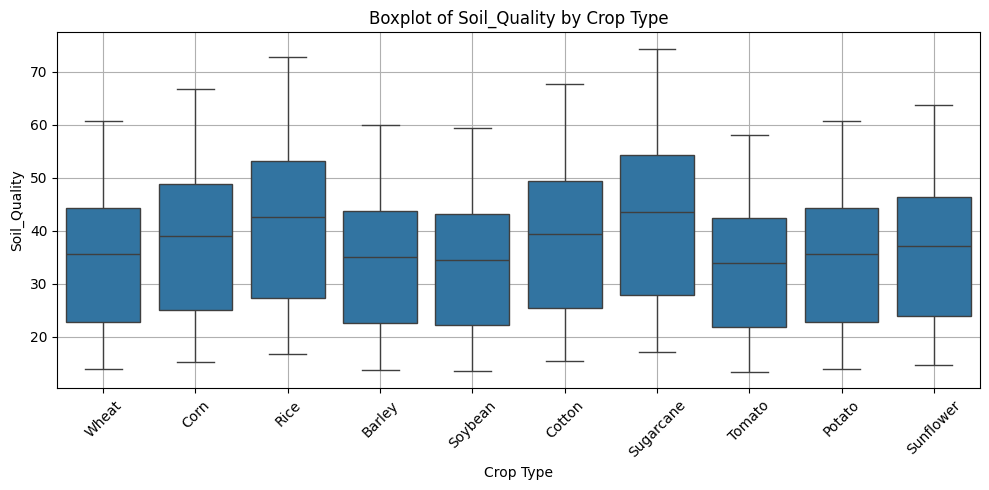

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Crop_Type', y='Soil_Quality', data=df)

plt.title('Boxplot of Soil_Quality by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Soil_Quality')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Group by temperature category and calculate mean yield
mean_yield = df.groupby('Soil_Quality')['Crop_Yield'].mean()

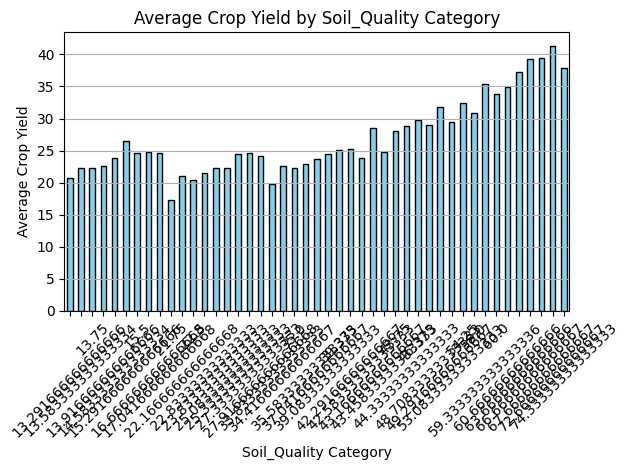

In [11]:
# Plot bar chart
mean_yield.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Crop Yield by Soil_Quality Category')
plt.ylabel('Average Crop Yield')
plt.xlabel('Soil_Quality Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [12]:
# Group by Crop_Type and Temp_Category, calculate mean Crop_Yield
grouped = df.groupby(['Crop_Type', 'Soil_Quality'])['Crop_Yield'].mean().unstack()

C:\Users\james\AppData\Local\Temp\ipykernel_16536\3477871908.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


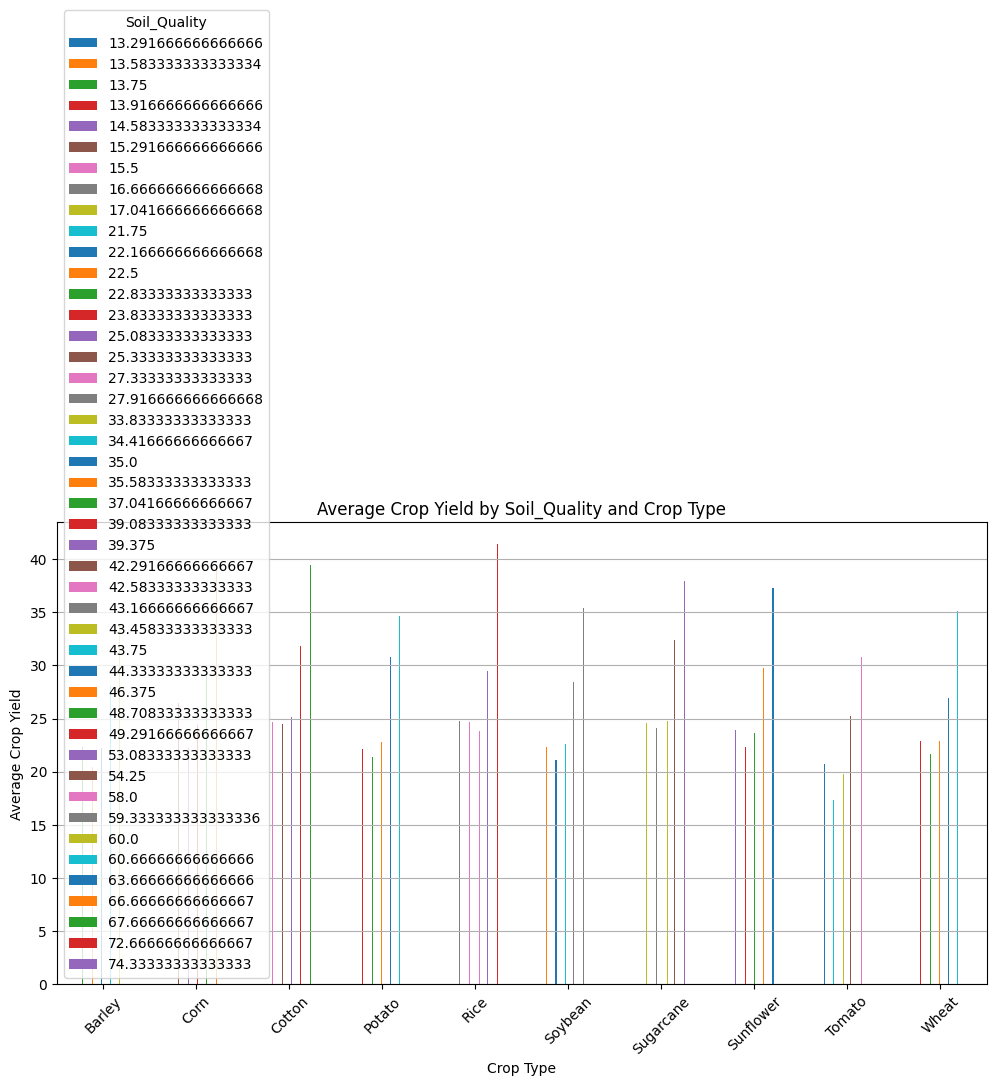

In [13]:
# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Crop Yield by Soil_Quality and Crop Type')
plt.ylabel('Average Crop Yield')
plt.xlabel('Crop Type')
plt.xticks(rotation=45)
plt.legend(title='Soil_Quality')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [14]:
# Define custom bins 
bins = [ 20, 40, 50, 60, 70, 80]  # 예: 0~10, 10~20, 20~30, 30~40
labels = ['Very Low Quality', 'Low Quality', 'Medium Quality', 'High Quality', 'Very High Quality']

# Create a new column 'Temp_Category' based on the bins
df['Soil_Quality_Category'] = pd.cut(df['Soil_Quality'], bins=bins, labels=labels, include_lowest=True)

print(df[['Soil_Quality', 'Soil_Quality_Category']].head())

   Soil_Quality Soil_Quality_Category
0     22.833333      Very Low Quality
1     66.666667          High Quality
2     27.333333      Very Low Quality
3     35.000000      Very Low Quality
4     22.166667      Very Low Quality


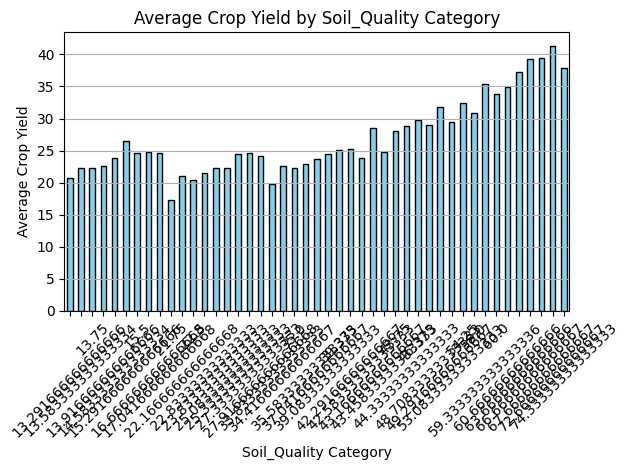

In [15]:
# Group by temperature category and calculate mean yield
mean_yield = df.groupby('Soil_Quality')['Crop_Yield'].mean()
# Plot bar chart
mean_yield.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Crop Yield by Soil_Quality Category')
plt.ylabel('Average Crop Yield')
plt.xlabel('Soil_Quality Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_16536\965506339.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Soil_Quality_Category', 'Crop_Type'])['Crop_Yield']


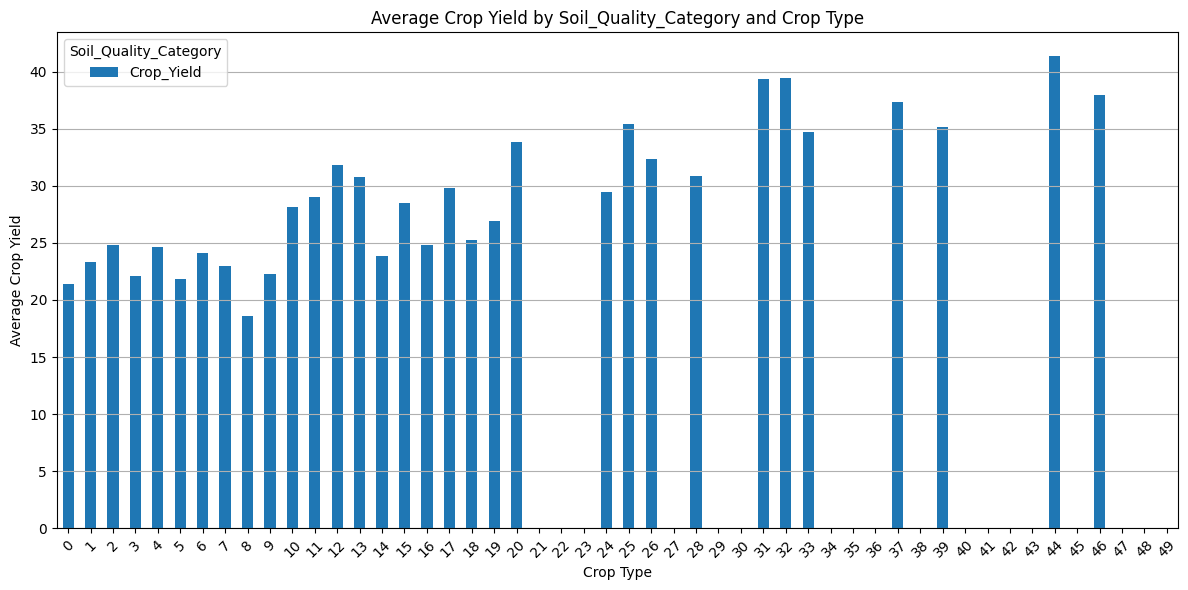

In [16]:
# # Calculate average crop yield by Soil_Quality_Category and Crop Type
grouped = (
    df.groupby(['Soil_Quality_Category', 'Crop_Type'])['Crop_Yield']
    .mean()
    .reset_index()
)

# Pivot the table so that Soil_Quality_Category becomes columns
pivot_df = grouped.pivot(index='Crop_Type', 
                         columns='Soil_Quality_Category', 
                         values='Crop_Yield')



# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Crop Yield by Soil_Quality_Category and Crop Type')
plt.ylabel('Average Crop Yield')
plt.xlabel('Crop Type')
plt.xticks(rotation=45)
plt.legend(title='Soil_Quality_Category')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_16536\59947155.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Soil_Quality_Category', 'Crop_Type'])['Crop_Yield']


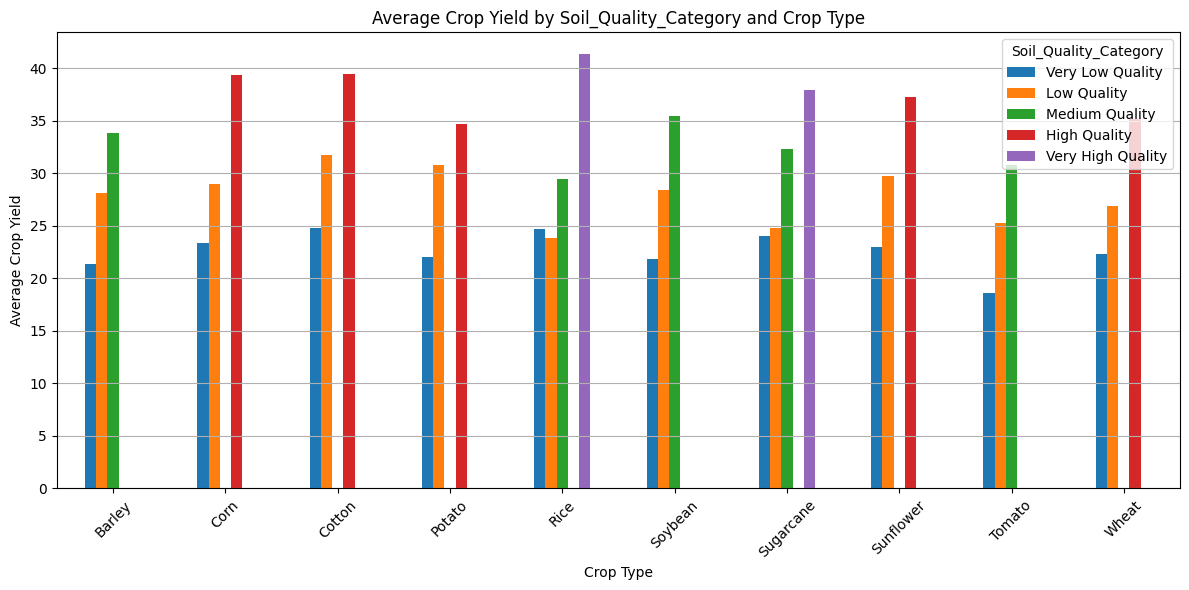

In [17]:
# Group by Soil_Quality_Category and Crop_Type, then calculate mean
grouped = (
    df.groupby(['Soil_Quality_Category', 'Crop_Type'])['Crop_Yield']
    .mean()
    .reset_index()
)

# Pivot the table so that Soil_Quality_Category becomes columns
pivot_df = grouped.pivot(index='Crop_Type',
                         columns='Soil_Quality_Category',
                         values='Crop_Yield')



# Plot grouped bar chart with Crop_Type names on the x-axis
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.title('Average Crop Yield by Soil_Quality_Category and Crop Type')
plt.ylabel('Average Crop Yield')
plt.xlabel('Crop Type')
plt.xticks(rotation=45)  # Keep crop type names angled for readability
plt.legend(title='Soil_Quality_Category')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

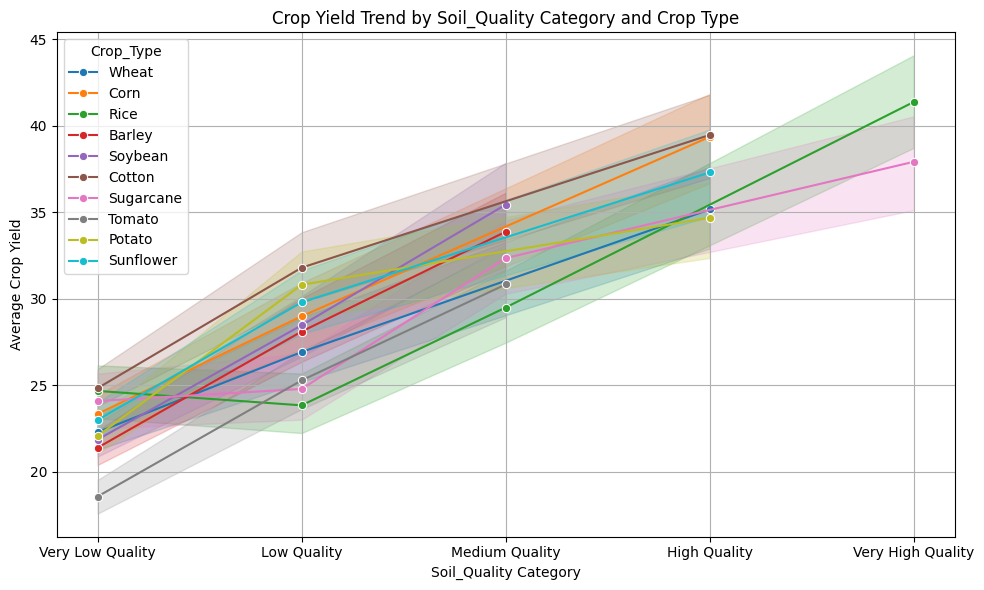

In [18]:
plt.figure(figsize=(10, 6))
# Seaborn lineplot: 평균 Crop_Yield by Crop_Type and Temp_Category
sns.lineplot(data=df, x='Soil_Quality_Category', y='Crop_Yield', hue='Crop_Type', marker='o')

plt.title('Crop Yield Trend by Soil_Quality Category and Crop Type')
plt.xlabel('Soil_Quality Category')
plt.ylabel('Average Crop Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Example: Apply One-Hot Encoding to the 'Crop_Type' column
if 'Crop_Type' in df.columns:
    df = pd.get_dummies(df, columns=['Crop_Type'], prefix='Crop')
    print(df)

             Date Soil_Type  Soil_pH     N     P     K  Soil_Quality  \
0      2014-01-01     Peaty     5.50  60.5  45.0  31.5     22.833333   
1      2014-01-01     Loamy     6.50  84.0  66.0  50.0     66.666667   
2      2014-01-01     Peaty     5.50  71.5  54.0  38.5     27.333333   
3      2014-01-01     Sandy     6.75  50.0  40.0  30.0     35.000000   
4      2014-01-01     Peaty     5.50  49.5  45.0  38.5     22.166667   
...           ...       ...      ...   ...   ...   ...           ...   
36515  2023-12-31      Clay     6.25  66.0  55.0  48.0     49.291667   
36516  2023-12-31     Peaty     5.50  71.5  54.0  42.0     27.916667   
36517  2023-12-31     Sandy     6.75  50.0  36.0  30.0     33.833333   
36518  2023-12-31     Peaty     5.50  60.5  45.0  31.5     22.833333   
36519  2023-12-31      Clay     6.25  60.0  55.0  44.0     46.375000   

       Crop_Yield  Year  Month  ...  Crop_Barley Crop_Corn  Crop_Cotton  \
0        0.000000  2014      1  ...        False     False  

In [20]:
pd.set_option('display.max_columns', None)
print(df.columns.tolist())

['Date', 'Soil_Type', 'Soil_pH', 'N', 'P', 'K', 'Soil_Quality', 'Crop_Yield', 'Year', 'Month', 'Day', 'Soil_Quality_Category', 'Crop_Barley', 'Crop_Corn', 'Crop_Cotton', 'Crop_Potato', 'Crop_Rice', 'Crop_Soybean', 'Crop_Sugarcane', 'Crop_Sunflower', 'Crop_Tomato', 'Crop_Wheat']


In [21]:
df_rice = df[df['Crop_Rice'] == 1]
print(df_rice)

             Date Soil_Type  Soil_pH     N     P     K  Soil_Quality  \
2      2014-01-01     Peaty     5.50  71.5  54.0  38.5     27.333333   
12     2014-01-02     Peaty     5.50  71.5  54.0  38.5     27.333333   
22     2014-01-03    Saline     8.00  84.5  66.0  49.5     16.666667   
32     2014-01-04      Clay     6.25  78.0  60.0  44.0     53.083333   
42     2014-01-05      Clay     6.25  78.0  60.0  44.0     53.083333   
...           ...       ...      ...   ...   ...   ...           ...   
36472  2023-12-27     Loamy     6.50  91.0  72.0  55.0     72.666667   
36482  2023-12-28      Clay     6.25  78.0  60.0  44.0     53.083333   
36492  2023-12-29     Loamy     6.50  91.0  72.0  55.0     72.666667   
36502  2023-12-30     Sandy     6.75  65.0  48.0  33.0     42.583333   
36512  2023-12-31     Sandy     6.75  65.0  48.0  33.0     42.583333   

       Crop_Yield  Year  Month  Day Soil_Quality_Category  Crop_Barley  \
2        0.000000  2014      1    1      Very Low Quality    

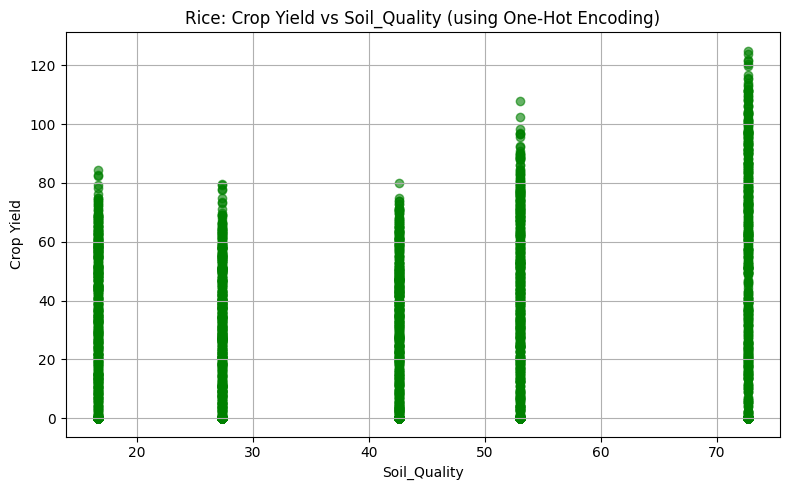

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(df_rice['Soil_Quality'], df_rice['Crop_Yield'], color='green', alpha=0.6)
plt.title('Rice: Crop Yield vs Soil_Quality (using One-Hot Encoding)')
plt.xlabel('Soil_Quality')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.tight_layout()
plt.show()